1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [1]:
import numpy as np
from scipy import stats as st
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

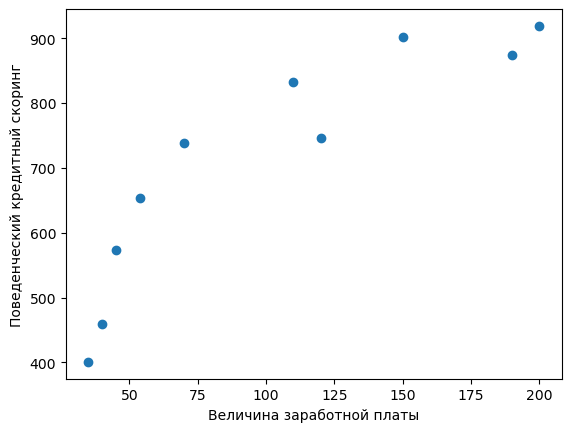

In [3]:
plt.scatter(x, y)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

In [4]:
model = LinearRegression()
xx = x.reshape(-1, 1)
model.fit(xx, y)
r_sq = model.score(xx, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.7876386635293686
intercept: 444.17735732435955
slope: [2.62053888]


In [6]:
b1 = (len(x)*np.sum(y*x)-np.sum(x)*np.sum(y))/(len(x)*np.sum(x**2)-np.sum(x)**2)
b1

2.6205388824027653

In [7]:
b0 = np.mean(y)-b1*np.mean(x)
b0

444.17735732435955

In [8]:
y_pred = 444.177 + 2.62 *x
y_pred

array([535.877, 562.077, 941.977, 968.177, 548.977, 627.577, 585.657,
       837.177, 758.577, 732.377])

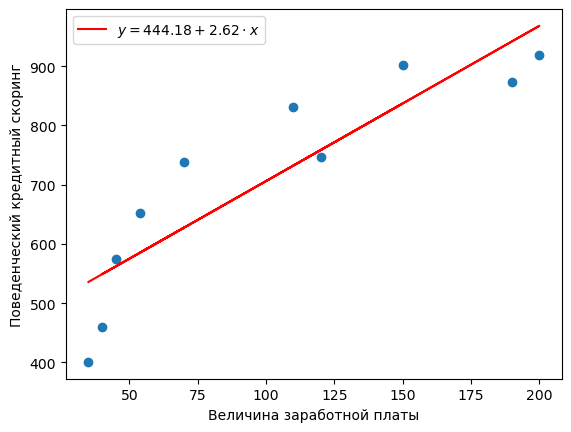

In [9]:
plt.scatter(x,y)
plt.plot(x, 444.18+2.62*x, c='r', label=r'$y=444.18+2.62\cdot x$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Используем матричный метод

In [11]:
x_res = x.reshape((10,1))
x_res

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [12]:
y_res = y.reshape((10,1))
y_res

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

С интерсептом

In [13]:
X = np.hstack([np.ones((10,1)),x_res])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [14]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y_res)
B

array([[444.17735732],
       [  2.62053888]])

Без интерсепта

In [16]:
BB = np.dot(np.linalg.inv(np.dot(x_res.T,x_res)), x_res.T @ y_res)
BB

array([[5.88982042]])

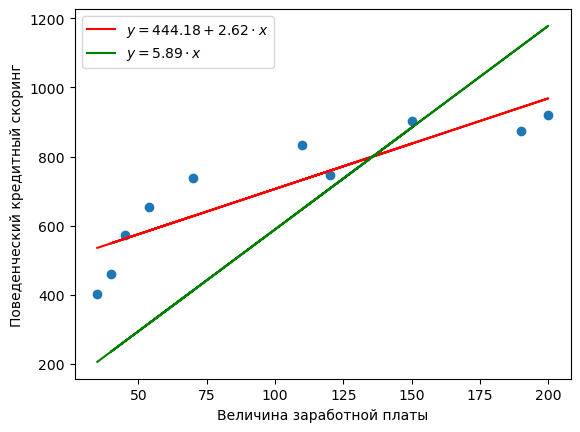

In [21]:
plt.scatter(x,y)
plt.plot(x, 444.18+2.62*x, c='r', label=r'$y=444.18+2.62\cdot x$')
plt.plot(x, 5.89*x, c='g', label=r'$y=5.89\cdot x$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Градиентный спуск без интерсепта

In [23]:
n = len(x)

In [24]:
def mse_(B1, y=y, x=x, n = 10):
    return np.sum((B1*x -y)**2)/n

In [25]:
alpha = 1e-6

In [36]:
b = 0.1

In [64]:
for i in range(6600,6625):
    B1 -= alpha *(2/n) * np.sum ((B1*x-y)*x)
    print ('B1 = {B1}, mse ={mse}'.format(B1=B1, mse = mse_(B1)))

B1 = 5.88982041999681, mse =56516.8584157194
B1 = 5.889820420000554, mse =56516.8584157194
B1 = 5.889820420004194, mse =56516.8584157194
B1 = 5.889820420007735, mse =56516.85841571941
B1 = 5.889820420011177, mse =56516.8584157194
B1 = 5.889820420014526, mse =56516.8584157194
B1 = 5.889820420017782, mse =56516.8584157194
B1 = 5.889820420020948, mse =56516.85841571941
B1 = 5.8898204200240265, mse =56516.85841571941
B1 = 5.8898204200270206, mse =56516.85841571941
B1 = 5.889820420029932, mse =56516.85841571941
B1 = 5.8898204200327635, mse =56516.85841571941
B1 = 5.889820420035517, mse =56516.85841571941
B1 = 5.889820420038194, mse =56516.8584157194
B1 = 5.889820420040797, mse =56516.85841571941
B1 = 5.889820420043329, mse =56516.8584157194
B1 = 5.889820420045791, mse =56516.85841571943
B1 = 5.889820420048186, mse =56516.8584157194
B1 = 5.889820420050514, mse =56516.85841571941
B1 = 5.889820420052778, mse =56516.85841571941
B1 = 5.8898204200549795, mse =56516.85841571941
B1 = 5.889820420057

Градиентный спуск с интерсептом

In [65]:
def _mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

In [66]:
def _mse_pa(a,b,x,y): 
    return 2*np.sum((a+b*x)-y)/len(x)

In [67]:
def _mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

In [68]:
alpha2=5e-05

In [69]:
b=0.1
a=0.1
mseab_min=_mse_ab(a,b,x,y)
i_min=1
b_min=b
a_min=a
   
for i in range(1000000):
    a-=alpha2*_mse_pa(a,b,x,y)
    b-=alpha2*_mse_pb(a,b,x,y)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={_mse_ab(a, b, x,y)}')
    if _mse_ab(a, b,x,y)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=_mse_ab(a, b,x,y)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min}\nb={b_min}')

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444

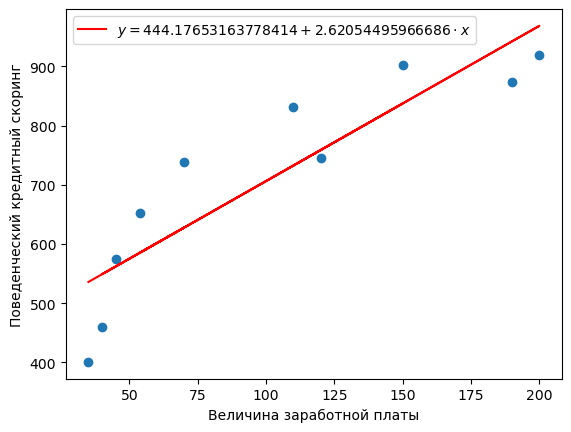

In [70]:
plt.scatter(x,y)
plt.plot(x,a_min+b_min*x, c='r', label=r'$y=444.17653163778414+2.62054495966686\cdot x$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()